In [1]:
# import requests        # for making http requests to binance
# import json            # for parsing what binance sends back to us
# import pandas as pd    # for storing and manipulating the data we get back
# import numpy as np     # numerical python, i usually need this somewhere 
#                        # and so i import by habit nowadays

# import matplotlib.pyplot as plt # for charts and such
    
# import datetime as dt  # for dealing with times

# def get_bars(symbol, interval = '1h'):
#     root_url = 'https://api.binance.com/api/v1/klines'
#     url = root_url + '?symbol=' + symbol + '&interval=' + interval
#     data = json.loads(requests.get(url).text)
#     df = pd.DataFrame(data)
#     df.columns = ['open_time',
#                  'o', 'h', 'l', 'c', 'v',
#                  'close_time', 'qav', 'num_trades',
#                  'taker_base_vol', 'taker_quote_vol', 'ignore']
#     df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
#     return df

# steemeth = get_bars('STEEMETH')
# ethusdt = get_bars('ETHUSDT')
# steemusdt = steemeth['c'].astype('float') * ethusdt['c'].astype('float')

# steemusdt.plot(figsize=(16,9))

In [2]:
# ethusdt

In [3]:
# url = 'https://api.binance.com/api/v3/klines'
# symbol = 'ADAUSDT'
# interval = '1h'
# start = str(int(dt.datetime(2021,5,1).timestamp()*1000))
# end = str(int(dt.datetime(2021,8,1).timestamp()*1000))
# par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end}
# data = pd.DataFrame(json.loads(requests.get(url, params= par).text))
# #format columns name
# data.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
# data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]
# data=data.astype(float)

In [4]:
# data['close'].astype('float').plot(figsize=(16,9))

In [5]:
# len(data)

In [6]:
# start = str(int(dt.datetime(2021,8,1).timestamp()*1000))
# end = str(int(dt.datetime(2021,10,1).timestamp()*1000))
# par = {'symbol': symbol, 'interval': interval, 'startTime': start, 'endTime': end, 'limit': 1000}
# data = pd.DataFrame(json.loads(requests.get(url, params= par).text))
# #format columns name
# data.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']
# data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.datetime]
# data=data.astype(float)

In [7]:
# data['close'].astype('float').plot(figsize=(16,9))

In [8]:
# len(data)

In [9]:
# import os

# from binance.client import Client

In [10]:
# # init
# api_key = os.environ.get('binance_api')
# api_secret = os.environ.get('binance_secret')

In [11]:
# client = Client(api_key, api_secret)

In [12]:
# # get latest price from Binance API
# btc_price = client.get_symbol_ticker(symbol="BTCUSDT")
# # print full output (dictionary)
# print(btc_price)

In [13]:
# from time import sleep

# from binance import ThreadedWebsocketManager

In [14]:
# btc_price = {'error':False}

In [15]:
# def btc_trade_history(msg):
#     ''' define how to process incoming WebSocket messages '''
#     if msg['e'] != 'error':
#         print(msg['c'])
#         btc_price['last'] = msg['c']
#         btc_price['bid'] = msg['b']
#         btc_price['last'] = msg['a']
#         btc_price['error'] = False
#     else:
#         btc_price['error'] = True

In [16]:
# # init and start the WebSocket
# bsm = ThreadedWebsocketManager()
# bsm.start()

In [17]:
# subscribe to a stream
# bsm.start_symbol_ticker_socket(callback=btc_trade_history, symbol='BTCUSDT')

In [18]:
# stop websocket
# bsm.stop()

In [19]:
# # valid intervals - 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M

# # get timestamp of earliest date data is available
# timestamp = client._get_earliest_valid_timestamp('BTCUSDT', '1d')
# print(timestamp)

In [20]:
# # request historical candle (or klines) data
# bars = client.get_historical_klines('BTCUSDT', '1d', timestamp, limit=1000)

In [21]:
# # option 1 - save to file using json method
# with open('btc_bars.json', 'w') as e:
#     json.dump(bars, e)

In [22]:
# # delete unwanted data - just keep date, open, high, low, close
# for line in bars:
#     del line[5:]

In [23]:
# # option 4 - create a Pandas DataFrame and export to CSV
# btc_df = pd.DataFrame(bars, columns=['date', 'open', 'high', 'low', 'close'])
# btc_df.set_index('date', inplace=True)
# print(btc_df.head())

In [24]:
# # export DataFrame to csv
# btc_df.to_csv('btc_bars3.csv')

In [25]:
# import sys
# !{sys.executable} -m pip install ta

In [26]:
# IMPORTS
import pandas as pd
import math
import os.path
import time
import pickle
# from bitmex import bitmex
from binance.client import Client
from datetime import timedelta, datetime
from dateutil import parser
# from tqdm import tqdm_notebook #(Optional, used for progress-bars)

### API
# bitmex_api_key = '[REDACTED]'    #Enter your own API-key here
# bitmex_api_secret = '[REDACTED]' #Enter your own API-secret here
# binance_api_key = '[REDACTED]'    #Enter your own API-key here
# binance_api_secret = '[REDACTED]' #Enter your own API-secret here
binance_api_key = os.environ.get('binance_api')
binance_api_secret = os.environ.get('binance_secret')

### CONSTANTS
binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}
batch_size = 750
# bitmex_client = bitmex(test=False, api_key=bitmex_api_key, api_secret=bitmex_api_secret)
binance_client = Client(api_key=binance_api_key, api_secret=binance_api_secret)


### FUNCTIONS
def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime('1 Jan 2017', '%d %b %Y')
    elif source == "bitmex": old = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=False).result()[0][0]['timestamp']
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    # if source == "binance": new = pd.to_datetime('2020-12-13 07:45:00')
    
    if source == "bitmex": new = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=True).result()[0][0]['timestamp']
    return old, new

def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime('1 Jan 2017', '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df


def get_all_binance_trades(symbol, kline_size, save = False):
    filename = '%s-%s-trades.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime('1 Jan 2017', '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_trades(symbol, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df

# def get_all_bitmex(symbol, kline_size, save = False):
#     filename = '%s-%s-data.csv' % (symbol, kline_size)
#     if os.path.isfile(filename): data_df = pd.read_csv(filename)
#     else: data_df = pd.DataFrame()
#     oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "bitmex")
#     delta_min = (newest_point - oldest_point).total_seconds()/60
#     available_data = math.ceil(delta_min/binsizes[kline_size])
#     rounds = math.ceil(available_data / batch_size)
#     if rounds > 0:
#         print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data in %d rounds.' % (delta_min, symbol, available_data, kline_size, rounds))
#         for round_num in tqdm_notebook(range(rounds)):
#             time.sleep(1)
#             new_time = (oldest_point + timedelta(minutes = round_num * batch_size * binsizes[kline_size]))
#             data = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=batch_size, startTime = new_time).result()[0]
#             temp_df = pd.DataFrame(data)
#             data_df = data_df.append(temp_df)
#     data_df.set_index('timestamp', inplace=True)
#     if save and rounds > 0: data_df.to_csv(filename)
#     print('All caught up..!')
#     return data_df

In [27]:
get_all_binance('ETHBTC', '1d', save = True)

All caught up..!


,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
timestamp,,,,,,,,,,,
2017-07-14,0.08,0.091033,0.08,0.090993,1942.06,1500076799999,170.239,1994,1076.4,94.8253,22262.3
2017-07-15,0.090993,0.093699,0.087127,0.087635,4013.07,1500163199999,363.032,4623,2250.32,203.541,22275.4
2017-07-16,0.087508,0.087635,0.075591,0.082241,8904.16,1500249599999,722.212,8137,5557.57,450.344,22295.5
2017-07-17,0.082368,0.088394,0.081699,0.087537,6650.93,1500335999999,568.247,7639,3859.49,329.669,22165.7
2017-07-18,0.087831,0.109068,0.084777,0.107732,7245.74,1500422399999,674.498,8121,4202.06,393.111,22505.6
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-03 00:00:00,0.080963,0.081336,0.080657,0.08111,18668.2,1641254399999,1510.98,36881,8420.86,681.587,0
2022-01-03 00:00:00,0.080963,0.081336,0.080657,0.081112,18668.3,1641254399999,1511,36883,8421.05,681.602,0
2022-01-03 00:00:00,0.080963,0.081336,0.080657,0.080969,20729.5,1641254399999,1678.09,42623,9346.25,756.611,0


In [28]:
binance_symbols = ['BTCUSDT', 'ETHBTC', 'BNBBTC', 'SOLBTC', 'ADABTC', 'XRPBTC',
                   'DOTBTC', 'LUNABTC', 'DOGEBTC']
for symbol in binance_symbols:
    get_all_binance(symbol, '1d', save = True)

All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!


In [29]:
for symbol in binance_symbols:
    get_all_binance(symbol, '1h', save = True)

All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!


In [30]:
for symbol in binance_symbols:
    get_all_binance(symbol, '1m', save = True)

All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!


In [31]:
# symbol, kline_size = ('XRPBTC', '1m')

# filename = '%s-%s-data.csv' % (symbol, kline_size)
# if os.path.isfile(filename): data_df = pd.read_csv(filename)
# else: data_df = pd.DataFrame()
# oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
# delta_min = (newest_point - oldest_point).total_seconds()/60
# available_data = math.ceil(delta_min/binsizes[kline_size])

# print(newest_point)
# print(oldest_point)
# print(available_data)

In [32]:
kline_size = '1m'

filename = '%s-%s-data.csv' % ('BTCUSDT', kline_size)
if os.path.isfile(filename): data_df = pd.read_csv(filename)
else: print('file not found')
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'])
data_df.set_index('timestamp', inplace=True)
all_crncs_df = pd.DataFrame(index=data_df.index)


for symbol in binance_symbols:
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: print('file not found')
    data_df['timestamp'] = pd.to_datetime(data_df['timestamp'])
    data_df.set_index('timestamp', inplace=True)
    tmp_df = pd.DataFrame()
    tmp_df[symbol] = data_df['close']
    all_crncs_df = pd.merge(all_crncs_df, tmp_df, how="outer", left_index=True, right_index=True)
    # all_crncs_df = all_crncs_df.join(tmp_df)    

In [33]:
all_crncs_df

,BTCUSDT,ETHBTC,BNBBTC,SOLBTC,ADABTC,XRPBTC,DOTBTC,LUNABTC,DOGEBTC
timestamp,,,,,,,,,
2017-07-14 04:00:00,NaN,0.08,0.000048,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-14 04:01:00,NaN,0.08,0.000035,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-14 04:02:00,NaN,0.08,0.000035,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-14 04:03:00,NaN,0.08,0.000040,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-14 04:04:00,NaN,0.08,0.000036,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-01-03 10:48:00,NaN,NaN,NaN,NaN,0.000029,0.000018,0.000625,0.001981,0.000004
2022-01-03 10:49:00,NaN,NaN,NaN,NaN,0.000029,0.000018,0.000626,0.001984,0.000004
2022-01-03 10:50:00,NaN,NaN,NaN,NaN,0.000029,0.000018,0.000627,0.001984,0.000004


In [34]:
#@ title Visualization Utilities
import matplotlib.pyplot as plt

# Color Palette
colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    # "cyan",
]

# Plots each column as a time series
def visualize_plots(dataset, columns):
    features = dataset[columns]
    fig, axes = plt.subplots(
        nrows=len(columns)//2 + len(columns)%2, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i, col in enumerate(columns):
        c = colors[i % (len(colors))]
        t_data = dataset[col]
        t_data.index = dataset.index
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(col),
            rot=25,
        )
    ax.legend([col])
    plt.tight_layout()

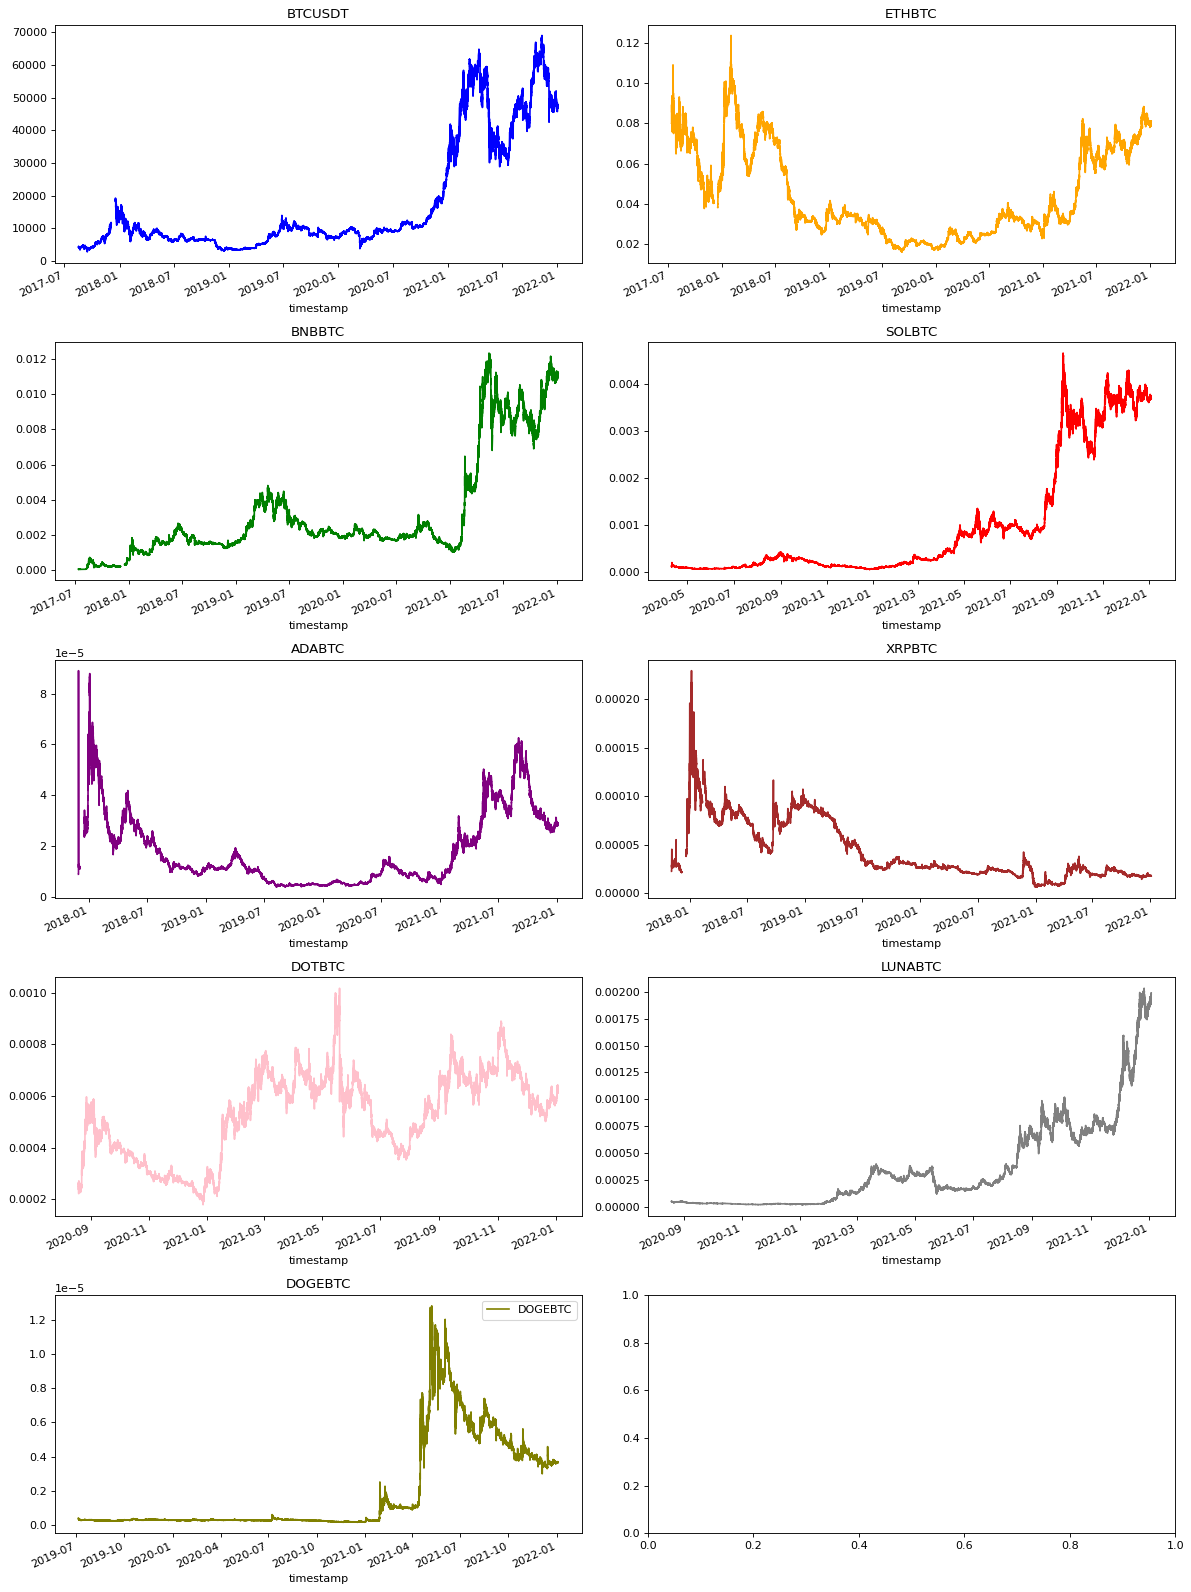

In [35]:
visualize_plots(all_crncs_df, binance_symbols)

In [36]:
import numpy as np
import tensorflow as tf
import math
import holidays
from govuk_bank_holidays.bank_holidays import BankHolidays
uk_holidays = holidays.England()
us_holidays = holidays.UnitedStates()
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, RBF

from tensorflow.keras import backend as K, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Reshape, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_convergence
from skopt.plots import plot_objective, plot_evaluations
from skopt.plots import plot_histogram, plot_objective_2D
from skopt.utils import use_named_args

import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

The below cells define a class WindowGenerator and its methods/properties taht will allow us to conveniently slide multidimensional time series into batches for the (probabilistic) neural net.

In [37]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df, val_df, test_df, label_columns=None):
        
        # store the raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
        
        # work out the label column indices
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_column_indices = {name: i for i, name in
                                        enumerate(label_columns)}
            
        self.column_indices = {name: i for i, name in
                              enumerate(train_df.columns)}
        
        #work out the window parameters
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
        
        self.total_window_size = input_width + shift
        
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
        
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
        
    def __repr__(self):
        return '/n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label Indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])       

In [38]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)
        
        # Slicing doesnt preserve static shape information, so set the shapes
        # manually. This way the 'tf.data.Datasets' are easier to inspect
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        
        return inputs, labels
    
WindowGenerator.split_window = split_window

In [39]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=data,
    targets=None,
    sequence_length=self.total_window_size,
    sequence_stride=1,
    shuffle=False,
    batch_size=32)
    
    ds = ds.map(self.split_window)
    
    return ds

WindowGenerator.make_dataset = make_dataset

In [40]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    # Get and cache an example batch of 'inputs, labels' for plotting
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the '.train' dataset
        result = next(iter(self.train))
        # adn cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

A rather simple and lazy implementation of a train/test split, instead of the usual sklearn version. Partly motivated by the fact that I dont want shuffling for display/plotting purposes. The training of the neural net will indeed use shuffling.

In [41]:
def create_train_test(df):
    n = len(df)
    train_df = df[:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]
    
    return train_df, val_df, test_df

In [42]:
kline_size = '1m'

filename = '%s-%s-data.csv' % ('BTCUSDT', kline_size)
if os.path.isfile(filename): data_df = pd.read_csv(filename)
else: print('file not found')
data_df['timestamp'] = pd.to_datetime(data_df['timestamp'])

data_df['date'] = pd.to_datetime(data_df['timestamp']).dt.date
data_df['weekday'] = data_df['timestamp'].dt.dayofweek
data_df['friday'] = data_df['weekday'] == 4
data_df['hour'] = data_df['timestamp'].dt.hour
data_df['month'] = data_df['timestamp'].dt.month
data_df['december'] = data_df['month']==12
data_df['is_quarter_end'] = data_df['timestamp'].dt.is_quarter_end

data_df['after_4'] = data_df['hour'] >= 11
data_df['after_5'] = data_df['hour'] >= 12
data_df['minute'] = data_df['timestamp'].dt.minute
data_df['date_tomo'] = data_df['date'] + timedelta(days=1)

# some more engineered features around the time till the next business day
data_df['1bd_ahead'] = data_df['date'] + pd.offsets.CustomBusinessDay(1, holidays=uk_holidays)
data_df['no_bd_ahead'] = data_df['1bd_ahead'] - data_df['timestamp']
data_df['no_bd_ahead_sec'] = data_df['no_bd_ahead'].dt.total_seconds()
data_df['no_bd_ahead_sec_late'] = 0
data_df.loc[data_df['after_4'], 'no_bd_ahead_sec_late'] = data_df.loc[data_df['after_4'], 'no_bd_ahead_sec']
data_df['no_bd_ahead_sec_late_log'] = np.log(np.maximum(1.0, data_df['no_bd_ahead_sec_late']))
data_df['no_bd_ahead_sec_late_uni'] = 1- np.exp(-(data_df['no_bd_ahead_sec_late']/data_df['no_bd_ahead_sec_late'].mean()))

# Importantly, this feature would need to be adjusted for CDX IG to US holidays
data_df['uk_hol'] = np.array([dte in uk_holidays for dte in data_df['date']])
data_df['uk_hol_tom'] = np.array([dte in uk_holidays for dte in data_df['date_tomo']])
data_df['uk_hol_tom_after4'] = data_df['uk_hol_tom'] & data_df['after_4'] 

# measuring 'boring friday afternoons' or early departures to the airport in the good old days
data_df['friday_after4'] = data_df['friday'] & data_df['after_4'] 
data_df['friday_after5'] = data_df['friday'] & data_df['after_5'] 



data_df.set_index('timestamp', inplace=True)
data_df['Timestamp'] = data_df.index.astype(np.int64)

In [43]:
data_df

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,...,no_bd_ahead_sec,no_bd_ahead_sec_late,no_bd_ahead_sec_late_log,no_bd_ahead_sec_late_uni,uk_hol,uk_hol_tom,uk_hol_tom_after4,friday_after4,friday_after5,Timestamp
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,1502942459999,7564.906851,3,0.075183,320.390851,...,72000.0,0.0,0.0,0.0,False,False,False,False,False,1502942400000000000
2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,1502942519999,0.000000,0,0.000000,0.000000,...,71940.0,0.0,0.0,0.0,False,False,False,False,False,1502942460000000000
2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1502942579999,1117.542921,2,0.261074,1117.542921,...,71880.0,0.0,0.0,0.0,False,False,False,False,False,1502942520000000000
2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,1502942639999,51.171852,3,0.012008,51.171852,...,71820.0,0.0,0.0,0.0,False,False,False,False,False,1502942580000000000
2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1502942699999,599.999338,1,0.140796,599.999338,...,71760.0,0.0,0.0,0.0,False,False,False,False,False,1502942640000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-03 10:37:00,47107.24,47143.50,47107.24,47129.01,11.725110,1641206279999,552518.971428,537,4.973590,234355.218906,...,48180.0,0.0,0.0,0.0,True,False,False,False,False,1641206220000000000
2022-01-03 10:38:00,47129.01,47143.50,47123.99,47140.78,8.375490,1641206339999,394764.046667,461,5.538450,261036.982282,...,48120.0,0.0,0.0,0.0,True,False,False,False,False,1641206280000000000
2022-01-03 10:39:00,47140.77,47170.00,47140.77,47163.15,14.255350,1641206399999,672301.251862,513,9.105910,429456.612968,...,48060.0,0.0,0.0,0.0,True,False,False,False,False,1641206340000000000


In [ ]:
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna


# Clean NaN values
print('len df before drop NA', len(data_df))
df_t5_b = data_df.dropna()
print('len df after drop NA', len(df_t5_b))


# # Add all ta features
df_t5_b = add_all_ta_features(
    df_t5_b, open="open", high="high", low="low", close="close", volume="volume")

len df before drop NA 2295949
len df after drop NA 2295949


In [ ]:
sum_nas = df_t5_b.isna().sum(axis=0)
not_na_columns = df_t5_b.loc[:,sum_nas<=50].columns
df_t5_b= df_t5_b.loc[:, not_na_columns]

In [ ]:
df_t5_b

In [ ]:
df_t5_b['returns'] = df_t5_b['close'].pct_change()

print('len df before drop NA', len(df_t5_b))
df_t5_b = df_t5_b.dropna()
print('len df after drop NA', len(df_t5_b))

In [ ]:
df_t5_b

A simple correlation analysis can help with feature selection

In [ ]:
df_t5_b['labels'] = df_t5_b['returns'].shift(-1)
print('len df before drop NA', len(df_t5_b))
df_t5_b = df_t5_b.dropna()
print('len df after drop NA', len(df_t5_b))

feature_corr = df_t5_b.corrwith(df_t5_b['labels'], method='kendall')
pred_features = feature_corr.abs().sort_values(ascending = False)[:20]
print(pred_features)

In [ ]:
import seaborn as sns

def show_correlation_heatmap(dataframe):
    plt.figure(figsize=(20,20))
    cor = dataframe.corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
    plt.show()

In [ ]:
show_correlation_heatmap(df_t5_b.loc[:,pred_features.index])

In [ ]:
selected_features = ['returns', 'volume_vpt', 'momentum_stoch_rsi', 'volume_em', 'volatility_kcp', 'hour', 'weekday']
# print((selected_features + ['labels']))
df_t5_b = df_t5_b.loc[:, selected_features + ['labels']] 

Standardisation/Normalisation often helps the performance of the algorithm. To prevent *peaking* into the future, I should be using the training set mean and stdev for standardisation

In [ ]:
df_t5_b_mean = df_t5_b[:int(len(df_t5_b)*0.7)].mean()
df_t5_b_std = df_t5_b[:int(len(df_t5_b)*0.7)].std()

In [ ]:
df_t5_b = (df_t5_b - df_t5_b_mean)/df_t5_b_std

The distribution of log arrival times looks much more Gaussian than the arrival times themseklves.

In [ ]:
fig, ax = plt.subplots()
df_t5_b['returns'].plot.hist(ax=ax, bins=100)

One of the beautiful things about the probabilistic regression is that we can also predict multivariate time series and their probability distributions. In the subtask of forecasting arrival times, the number of labels is one, but for the second subtask of forecasting notionals and the identifty of the index, at each trading timestamp of all indices would be multivariate regression in my mind. Unfortunately I dont have enough time for this.

In [ ]:
y_labels = ['returns']
num_labels = 1

# Hyperparameters
Here I set the hyperparameter space for the skopt optimisation.

In [ ]:
patience = 2
verbose = 2 

In [ ]:
epochs=5

In [ ]:
stochastic=True

In [ ]:
diag_shift = 1e-4

In [ ]:
dim_learning_rate = Real(low=1e-4, high=1e-3, prior='log-uniform', name='learning_rate')

In [ ]:
dim_kernel_reg_rate = Real(low=1e-3, high=1e-1, prior='log-uniform', name='kernel_reg_rate')

In [ ]:
dim_dropout = Real(low=1e-3, high=1e-1, prior='log-uniform', name='dropout')

In [ ]:
dim_num_units_layer1 = Integer(low=4, high=12, name='num_units_layer1')

In [ ]:
dim_conv_width = Integer(low=1, high=24, name='conv_width')

In [ ]:
dim_num_dense_layers = Integer(low=0, high=4, name='num_dense_layers')

In [ ]:
dim_num_dense_units = Integer(low=2, high=16, name='num_dense_units')

In [ ]:
dim_activation = Categorical(categories=['relu', 'sigmoid'], name='activation')

In [ ]:
dimensions = [dim_learning_rate,
              dim_kernel_reg_rate,
              dim_dropout,
              dim_num_units_layer1,
              dim_conv_width,
              dim_num_dense_layers,
              dim_num_dense_units,
              dim_activation
             ]

In [ ]:
dim_names = ['learning_rate',
             'kernel_reg_rate',
             'dropout',
             'num_units_layer1',
             'conv_width',
             'num_dense_layers',
             'num_dense_units',
             'activation']

In [ ]:
default_parameters = [0.0006,
                      0.055,
                      0.0054,
                      6,
                      19, 
                      2, 
                      12, 
                      'relu']

## Create Model

Defining the negative loglikelihood as the loss function for the stochastic model. The deterministic neural net uses the MSE as loss function.

In [ ]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)

The below function creates the neural net architecture and the corresponding data window.

In [ ]:
def create_model(learning_rate,
                 kernel_reg_rate,
                 dropout,
                 num_units_layer1,
                 conv_width,
                 num_dense_layers,
                 num_dense_units,
                 activation,
                 train_df,
                 val_df,
                 test_df,
                 num_labels,
                 y_labels):
    """""
    Hyperparamters:
    learning_rate: learning rate for the optimizer
    conv_width: The sequence length or convolution width of a LSTM/Conv layer  
    """""
    
    # Start construction of a Keras Sequential model
    model = Sequential()
    
    model.add(tf.keras.layers.LSTM(num_units_layer1,
                                   activation=activation,
                                   kernel_regularizer=regularizers.l1(kernel_reg_rate),
                                   dropout=dropout))
    
    window = WindowGenerator(input_width=conv_width,
                            label_width=1,
                            shift=1,
                            train_df=train_df,
                            val_df=val_df,
                            test_df=test_df,
                            label_columns=y_labels)
    
    # Add fully-connected / dense layers
    # The number of layers is a hyper-paramter we might want to optimize
    for i in range(num_dense_layers):
        name = 'layer_dense_{0}'.format(i+1)
        
        # add the dense layer
        # thre are two hyper parameters for optimization:
        # the number of units and the activation function
        model.add(Dense(num_dense_units, 
                        activation=activation, 
                        name=name))
        
    # TA final Dense and the probabilistic layer at the end
    
    if num_labels == 1:
        if stochastic:
            model.add(Dense(num_labels*2))

#             model.add(tfp.layers.DistributionLambda(
#                 lambda t: tfd.Exponential(rate=1e-5 + tf.math.softplus(t[...,:1]))
#             ))
            model.add(tfp.layers.DistributionLambda(
                lambda t: tfd.Normal(loc=t[...,:num_labels],
                                     scale=1e-5 + tf.math.softplus(t[...,num_labels:]))
            ))
        else:
            model.add(Dense(num_labels))
        
    else:
        if stochastic:
            model.add(Dense(num_labels + num_labels * (num_labels +1) / 2))
            model.add(tfp.layers.DistributionLambda(
                lambda t: tfd.MultivariateNormalTriL(loc=t[...,:num_labels],
                                                    scale_tril=tfb.FillScaleTriL(diag_bijector=tfb.Softplus(), diag_shift=diag_shift)(t[...,num_labels:])
                                                    )
            ))
        else:
            model.add(Dense(num_labels))
    
    # Using Adam for optimization
    optimizer = Adam(learning_rate=learning_rate)
    
    # Compiling the model
    if stochastic:
        model.compile(optimizer=optimizer,
                      loss=negloglik,
                      metrics=[tf.metrics.MeanAbsoluteError()])
    else:
        model.compile(optimizer=optimizer,
                      loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])
        

    
    return model, window

The below two clells create the train, val and test sets for the different models (the second cell is for the recurrent Neural Net.

In [ ]:
train_df, val_df, test_df = create_train_test(df_t5_b)

In [ ]:
# feature name = still to do tidy up
y_train = train_df['labels'].to_numpy()
train_df = train_df.drop(columns=['labels'])
X_train = train_df.loc[:, selected_features].to_numpy()

y_val = val_df['labels'].to_numpy()
val_df = val_df.drop(columns=['labels'])
X_val = val_df.loc[:, selected_features].to_numpy()


y_test = test_df['labels'].to_numpy()
test_df = test_df.drop(columns=['labels'])
X_test = test_df.loc[:, selected_features].to_numpy()

In [ ]:
test_df

Lets start with a simple linear regression to create a benchmark

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
print('Train set R2', reg.score(X_train,y_train))
print('Val set R2', reg.score(X_val,y_val))
print('Test set R2', reg.score(X_test,y_test))


pred_lr = reg.predict(X_test)
plt.scatter(pred_lr, y_test)

We might be able to improve by using a non-linear model. The below tree results look slightly better. Comparing the training set and val set error, it seems there is a fair bit of overfitting taking place.

In [ ]:
reg = DecisionTreeRegressor(max_depth=10,
                            min_samples_leaf=10,
                            min_samples_split=5).fit(X_train, y_train)

print('Train set R2', reg.score(X_train,y_train))
print('Val set R2', reg.score(X_val,y_val))
print('Test set R2', reg.score(X_test,y_test))


pred_lr = reg.predict(X_test)
plt.scatter(pred_lr, y_test)

A natural extension of a tree model is a random forest. This seems to work a little better than the tree. I have manually optimised the hyperparameters by trial and error on the val set.

In [ ]:
reg = RandomForestRegressor(bootstrap=True,
                            max_depth=10,
                            max_features=0.3,
                            min_samples_leaf=5,
                            min_samples_split=5,
                            n_estimators=15,
                            n_jobs=-1).fit(X_train, y_train)

print('Train set R2', reg.score(X_train,y_train))
print('Val set R2', reg.score(X_val,y_val))
print('Test set R2', reg.score(X_test,y_test))


pred_lr = reg.predict(X_test)
plt.scatter(pred_lr, y_test)

Transposing the results into the original arrival time space

In [ ]:
X = df_t5_b.loc[:, selected_features].to_numpy()

return_est = reg.predict(X) * df_t5_b_std['labels'] + df_t5_b_mean['labels']

In [ ]:
plt.scatter(return_est, df_t5_b['labels'] * df_t5_b_std['labels'] + df_t5_b_mean['labels'])

In [ ]:
train_df

Lets take it up a notch and train a deep learning model.

In [ ]:
#create the NN with the given hyperparameters

model, window = create_model(learning_rate=0.0005853726723939382,
                             kernel_reg_rate=0.05540070604192875,
                             dropout=0.005355971582096016,
                             num_units_layer1=6,
                             conv_width=19,
                             num_dense_layers=2,
                             num_dense_units=12,
                             activation='relu',
                             train_df=train_df,
                             val_df=val_df,
                             test_df=test_df,
                             num_labels=num_labels,
                             y_labels=y_labels)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience=patience,
                                                 mode='min')

history = model.fit(window.train,
                   epochs=epochs,
                   validation_data=window.val,
                   callbacks=[early_stopping],
                   shuffle=True,
                   verbose=verbose)

In [ ]:
# Stack three slices, the length of the total window.
# example_window = tf.stack([np.array(train_df[:window.total_window_size]),
#                            np.array(train_df[100:100+window.total_window_size]),
#                            np.array(train_df[200:200+window.total_window_size])])


t = [cnt for cnt in range(0, 10000, 100)]
example_window = tf.stack([np.array(train_df[cnt:cnt+window.total_window_size]) for cnt in t])


example_inputs, example_labels = window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

pred = model(example_inputs)

In [ ]:
if stochastic:
    mean_pred = pred.mean().numpy()
    quantile_5 = pred.quantile(0.05)
    quantile_95 = pred.quantile(0.95)
    print(f'quantile_5 shape: {quantile_5.shape}')
else:
    mean_pred = pred.numpy()
    
truth = example_labels.numpy()[:, 0, :]
# t = df_tmp.index[(window.total_window_size-1):]
# t = [cnt for cnt in range(0, 10000, 100)]
print(f'mean_pred shape: {mean_pred.shape}')
print(f'truth shape: {truth.shape}')

In [ ]:
fig = plt.figure(figsize=(25,8))
plt.plot(t, truth, label='Truth')
plt.plot(t, mean_pred, label='Mean pred')
if stochastic:
    plt.plot(t, quantile_5, label='5% quantile')
    plt.plot(t, quantile_95, label='95% quantile') 
plt.legend()

In [ ]:
plt.scatter(truth, mean_pred)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()

In [ ]:
model.evaluate(window.train)
model.evaluate(window.val)
model.evaluate(window.test)

In [ ]:
print(model.summary())

The below fitness fucntion will allow us to compare fitness values in the hyperparamter space 

In [ ]:
best_loss = np.inf

@use_named_args(dimensions=dimensions)
def fitness(learning_rate,
            kernel_reg_rate,
            dropout,
            num_units_layer1,
            conv_width,
            num_dense_layers,
            num_dense_units,
            activation):

    print('kernel_reg_rate', kernel_reg_rate)
    print('dropout', dropout)
    print('num_units_layer1', num_units_layer1)
    print('conv_width', conv_width)
    
    #create the NN with the given HPs
    model, window = create_model(learning_rate=learning_rate,
                                 kernel_reg_rate=kernel_reg_rate,
                                 dropout=dropout,
                                 num_units_layer1=num_units_layer1,
                                 conv_width=conv_width,
                                 num_dense_layers=num_dense_layers,
                                 num_dense_units=num_dense_units,
                                 activation=activation,
                                 train_df=train_df,
                                 val_df=val_df,
                                 test_df=test_df,
                                 num_labels=num_labels,
                                 y_labels=y_labels)
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=patience,
                                                     mode='min')

    try:    
        history = model.fit(window.train,
                           epochs=epochs,
                           validation_data=window.val,
                           callbacks=[early_stopping],
                           shuffle=True,
                           verbose=verbose)

        #collect the losses for the different sets
        loss = model.evaluate(window.val)[0]
        train_loss = model.evaluate(window.train)
        test_loss = model.evaluate(window.test)

        #save the model if it is better than the current best
        global best_loss

        if loss < best_loss:
            if stochastic:
                model.save('BTC_ProbTSregression_best_model.h5')
            else:
                model.save('BTC_DetTSregression_best_model.h5')
            best_loss = loss

    except:
        loss = 9999.0
            
    del model
    K.clear_session()
    return loss
    

### Test run
Making sure the default hyperparameters are eligible.

In [ ]:
fitness(x=default_parameters)

This small cell trigger the hyperparameter optimisation.

In [ ]:
%%time
n_calls = 11
search_result = gp_minimize(func=fitness,
                            dimensions=dimensions,
                            acq_func='EI', # expected improvement
                            n_calls=n_calls,
                            x0=default_parameters)

Plotting the progress in the fitness across iterations is useful

In [ ]:
plot_convergence(search_result)

This is the optimal set of hyperparameters.

In [ ]:
search_result.x

In [ ]:
search_result_dict = dict(zip(dim_names, search_result.x))
print(search_result_dict)

The below cell calculates the fitness value for this set of hyperparamters

In [ ]:
search_result.fun

In [ ]:
sorted(zip(search_result.func_vals, search_result.x_iters))

Some useful plots to visualize the hyperparamter space. The brighter the better, i.e. higher fitness.

In [ ]:
fig = plot_objective_2D(result=search_result,
                        dimension_identifier1='learning_rate',
                        dimension_identifier2='conv_width',
                        levels=50)

In [ ]:
ax = plot_objective(result=search_result,
                    plot_dims=dim_names)

In [ ]:
ax = plot_evaluations(result=search_result,
                      plot_dims=dim_names)

If the user doesnt want to do the full hyperparameter search, they can just load the optimal model and hyperparameters below. Set the stochastic variable to the right level to get either the determinsitic or stochastic model. Caveat: The optimal determinsitic model looks decent. For the stochastic model the hyperparamter optimsiation was runn on a smaller data set and can be further inproved.

In [ ]:
if stochastic:
    with open('search_result_dict_stoch.pkl', 'wb') as dumper:
        pickle.dump(search_result_dict, dumper)
        
else:
    with open('search_result_dict.pkl', 'wb') as dumper:
        pickle.dump(search_result_dict, dumper)

Loading (and compiling) the optimal model (if neccessary)

In [ ]:
if stochastic:
    model = load_model('BTC_ProbTSregression_best_model.h5', compile=False)
    with open('search_result_dict_stoch.pkl', 'rb') as input_file:
        search_result_dict = pickle.load(input_file)
else:
    model = load_model('BTC_DetTSregression_best_model.h5', compile=True)
    with open('search_result_dict.pkl', 'rb') as input_file:
        search_result_dict = pickle.load(input_file)
        
        
print(model.summary())

optimizer = Adam(learning_rate=search_result_dict['learning_rate'])

    
if stochastic:
    model.compile(optimizer=optimizer,
                     loss=negloglik,
                     metrics=[tf.metrics.MeanAbsoluteError()])
else:
    model.compile(optimizer=optimizer,
                 loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [ ]:
window=WindowGenerator(input_width=search_result_dict['conv_width'],
                       label_width=1,
                       shift=1, 
                       train_df=train_df, 
                       val_df=val_df,
                       test_df=test_df, 
                       label_columns=y_labels)

The test set error

In [ ]:
test_result=model.evaluate(window.test)

Visualizing the learned predictions vs the ground truth for a short interval

In [ ]:
stacked_df = [np.array(test_df[i:i+window.total_window_size]) for i in range(len(test_df)-window.total_window_size+1)]

example_window = tf.stack(stacked_df)

example_inputs, example_labels = window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

pred = model(example_inputs)

In [ ]:
if stochastic:
    mean_pred = pred.mean().numpy()
    quantile_5 = pred.quantile(0.05)
    quantile_95 = pred.quantile(0.95)
    print(f'quantile_5 shape: {quantile_5.shape}')
else:
    mean_pred = pred.numpy()
    
truth = example_labels.numpy()[:, 0, :]
t = df_tmp.index[(window.total_window_size-1):]

print(f'mean_pred shape: {mean_pred.shape}')
print(f'truth shape: {truth.shape}')

In [ ]:
fig = plt.figure(figsize=(25,8))
plt.plot(t, truth, label='Truth')
plt.plot(t, mean_pred, label='Mean pred')
if stochastic:
    plt.plot(t, quantile_5, label='5% quantile')
    plt.plot(t, quantile_95, label='95% quantile') 
plt.legend()

In [ ]:
plt.scatter(truth, mean_pred)